In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [115]:
data = pd.read_csv('iris-dataset.csv')

data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 最初のばらつき具合を確認

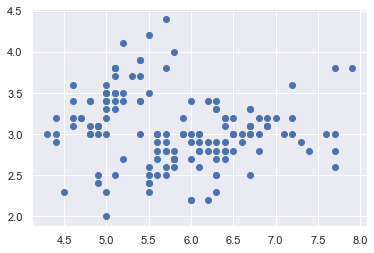

In [62]:
plt.scatter(data['sepal_length'],data['sepal_width'])

### 標準化

In [101]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(data)

###　wcssを求めエルボー法でクラスター数を推測する

In [102]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
wcss

C:\Users\fujir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.64354810949808,
 91.06677122728537,
 80.68337032720804,
 71.80697516774866,
 63.48781636997357,
 54.254921934922166]

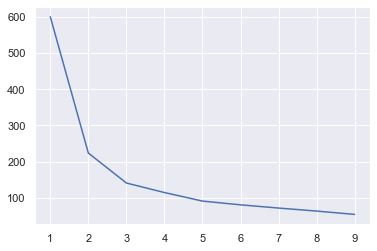

In [103]:
cluster_number=range(1,10)
plt.plot(cluster_number,wcss)

### 2つにクラスタリング

In [104]:
kmeans2=KMeans(2)
kmeans2.fit(x_scaled)
cluster2=kmeans2.predict(x_scaled)

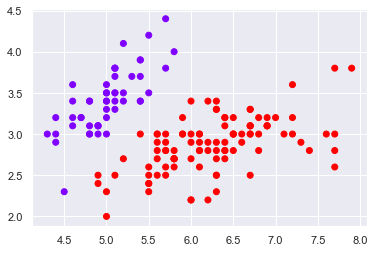

In [105]:
plt.scatter(data['sepal_length'],data['sepal_width'],c=cluster2,cmap='rainbow')

### 3つにクラスタリング


In [106]:
kmeans3=KMeans(3)
kmeans3.fit(x_scaled)
cluster3=kmeans3.predict(x_scaled)


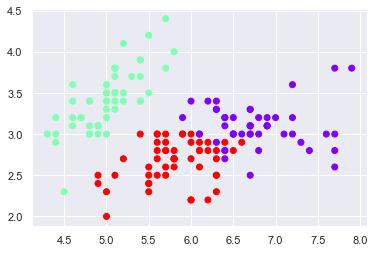

In [107]:
plt.scatter(data['sepal_length'],data['sepal_width'],c=cluster3,cmap='rainbow')

### 5つにクラスタリング

In [108]:
kmeans5=KMeans(5)
kmeans5.fit(x_scaled)
cluster5=kmeans5.predict(x_scaled)

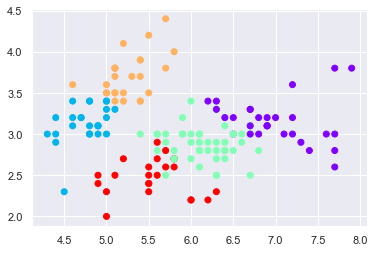

In [109]:
plt.scatter(data['sepal_length'],data['sepal_width'],c=cluster5,cmap='rainbow')

###　実際のデータで確認

In [110]:
real_data=pd.read_csv('iris_with_answers.csv')
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [111]:
real_data['species']=real_data['species'].map({'setosa':0,'versicolor':1,'virginica':2})

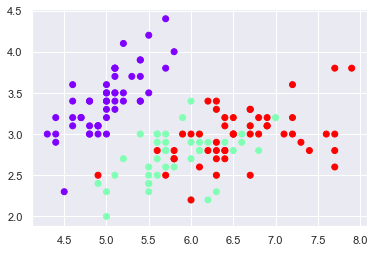

In [112]:
plt.scatter(data['sepal_length'],data['sepal_width'],c=real_data['species'],cmap='rainbow')

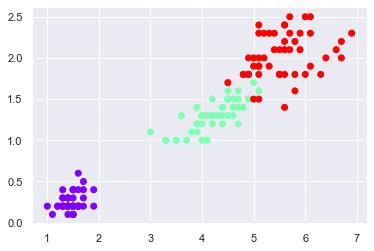

In [113]:
plt.scatter(data['petal_length'],data['petal_width'],c=real_data['species'],cmap='rainbow')